<a href="https://colab.research.google.com/github/tushar2k/AQI_Analysis/blob/master/AQI_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
from sklearn.preprocessing import MinMaxScaler
import sklearn.model_selection
import sklearn.metrics
import sklearn.neural_network
import requests
import lxml.html as lh
from sklearn.ensemble import RandomForestClassifier
from datetime import datetime
import datetime
!pip install apscheduler
from apscheduler.schedulers.blocking import BlockingScheduler

In [13]:
df_city_day= pd.read_csv("https://raw.githubusercontent.com/tushar2k/AQI_Analysis/master/Data/City_Day.csv")
df_city_day  = df_city_day.fillna(df_city_day.mean())

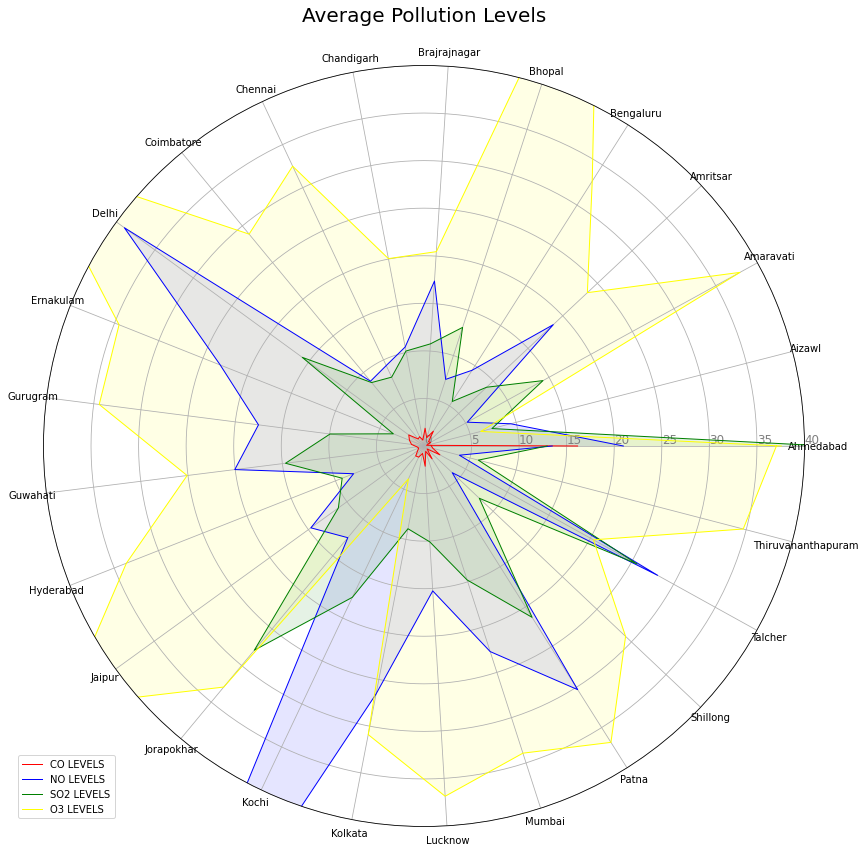

In [14]:
df_CO = df_city_day.pivot(index='Date', columns='City', values='CO')
df_CO = df_CO.fillna(df_CO.mean())

df_NO = df_city_day.pivot(index='Date', columns='City', values='NO')
df_NO = df_NO.fillna(df_NO.mean())

df_SO2 = df_city_day.pivot(index='Date', columns='City', values='SO2')
df_SO2 = df_SO2.fillna(df_SO2.mean())

df_O3 = df_city_day.pivot(index='Date', columns='City', values='O3')
df_O3 = df_O3.fillna(df_O3.mean())

categories=list(df_CO)[0:]
N = len(categories)

values_co  = df_CO.mean(axis=0)
values_no  = df_NO.mean(axis=0)
values_so2 = df_SO2.mean(axis=0)
values_o3  = df_O3.mean(axis=0)

angles = [n / float(N-1) * 2 * 3.14 for n in range(N-1)]
angles += angles[:1]

 
fig = plt.figure(figsize=(16,14))
ax = plt.subplot(111, polar=True)
 
plt.xticks(angles[:-1], categories, color='black', size=10)
 
ax.set_rlabel_position(0)
plt.yticks([0,5,10,15,20,25,30,35,40], ["0","5","10","15","20","25","30","35","40"], color="grey", size=12)
plt.ylim(0,40)
 
ax.plot(angles, values_co, 'red',linewidth=1, linestyle='solid', label="CO LEVELS")
ax.fill(angles, values_co, 'red', alpha=0.1)

ax.plot(angles, values_no, 'blue',linewidth=1, linestyle='solid', label="NO LEVELS")
ax.fill(angles, values_no, 'blue', alpha=0.1)

ax.plot(angles, values_so2,'green',linewidth=1, linestyle='solid', label="SO2 LEVELS")
ax.fill(angles, values_so2,'green', alpha=0.1)

ax.plot(angles, values_o3, 'yellow',linewidth=1, linestyle='solid', label="O3 LEVELS")
ax.fill(angles, values_o3, 'yellow', alpha=0.1)

plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.title("Average Pollution Levels",fontsize=20);

In [15]:
data = pd.read_csv("https://raw.githubusercontent.com/tushar2k/AQI_Analysis/master/Data/City_Day.csv")
data=data.drop(columns=['City','Xylene','Date','NO','NOx','NH3','Benzene','Toluene'])
data

,PM2.5,PM10,NO2,CO,SO2,O3,AQI,AQI_Bucket
0,NaN,NaN,18.22,0.92,27.64,133.36,NaN,NaN
1,NaN,NaN,15.69,0.97,24.55,34.06,NaN,NaN
2,NaN,NaN,19.30,17.40,29.07,30.70,NaN,NaN
3,NaN,NaN,18.48,1.70,18.59,36.08,NaN,NaN
4,NaN,NaN,21.42,22.10,39.33,39.31,NaN,NaN
...,...,...,...,...,...,...,...,...
29526,15.02,50.94,25.06,0.47,8.55,23.30,41.0,Good
29527,24.38,74.09,26.06,0.52,12.72,30.14,70.0,Satisfactory
29528,22.91,65.73,29.53,0.48,8.42,30.96,68.0,Satisfactory
29529,16.64,49.97,29.26,0.52,9.84,28.30,54.0,Satisfactory


In [ ]:
import missingno as msno
msno.matrix(data, filter=None, n=0, p=0, sort=None,
           figsize=(100, 100), width_ratios=(10, 1), color=(0.6, 0.3, 0.8),
           fontsize=60)

In [6]:
cor = data.corr()
cor.style.background_gradient(cmap='coolwarm')

,PM2.5,PM10,NO2,CO,SO2,O3,AQI
PM2.5,1.000000,0.846498,0.350709,0.089912,0.132325,0.161238,0.659181
PM10,0.846498,1.000000,0.464380,0.112588,0.256974,0.244919,0.803313
NO2,0.350709,0.464380,1.000000,0.356521,0.392233,0.293349,0.537071
CO,0.089912,0.112588,0.356521,1.000000,0.489697,0.041736,0.683346
SO2,0.132325,0.256974,0.392233,0.489697,1.000000,0.162142,0.490586
O3,0.161238,0.244919,0.293349,0.041736,0.162142,1.000000,0.198991
AQI,0.659181,0.803313,0.537071,0.683346,0.490586,0.198991,1.000000


In [7]:
data=data.dropna()

mn=MinMaxScaler()
X=data.iloc[:,:-2]
mn.fit(X)
X=mn.transform(X)
Y=data.iloc[:,-1]

data

,PM2.5,PM10,NO2,CO,SO2,O3,AQI,AQI_Bucket
1595,37.55,122.41,85.12,15.08,163.01,48.23,281.0,Poor
1596,33.97,116.32,79.71,14.67,91.26,51.86,330.0,Very Poor
1597,35.48,130.07,77.61,18.02,98.35,38.99,356.0,Very Poor
1598,34.11,138.31,75.23,13.27,88.66,42.22,359.0,Very Poor
1599,33.69,111.73,68.90,34.56,80.90,36.95,547.0,Severe
...,...,...,...,...,...,...,...,...
29526,15.02,50.94,25.06,0.47,8.55,23.30,41.0,Good
29527,24.38,74.09,26.06,0.52,12.72,30.14,70.0,Satisfactory
29528,22.91,65.73,29.53,0.48,8.42,30.96,68.0,Satisfactory
29529,16.64,49.97,29.26,0.52,9.84,28.30,54.0,Satisfactory


In [8]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size=0.3)

In [9]:
model=RandomForestClassifier(250, max_depth=9)
model.fit(X_train,Y_train)

print('\n---- Train data ----')
predictions = model.predict(X_train)
accuracy = sklearn.metrics.accuracy_score(Y_train, predictions)
print('Accuracy: {0:.2f}'.format(accuracy * 100.0))

print('\n---- Test data ----')
predictions = model.predict(X_test)
accuracy = sklearn.metrics.accuracy_score(Y_test, predictions)
print('Accuracy: {0:.2f}'.format(accuracy * 100.0))


---- Train data ----
Accuracy: 86.00

---- Test data ----
Accuracy: 80.45


In [10]:
def getCurrentData():
    
    url='https://aqicn.org/city/delhi/'
    page = requests.get(url)

    doc = lh.fromstring(page.content)
    tr_elements = doc.xpath('//tr')
    tr_elements=tr_elements[6:13]

    col=[]

    #Since out first row is the header, data is stored on the second row onwards
    for j in range(1,len(tr_elements)):
        #T is our j'th row
        T=tr_elements[j]

        #If row is not of size 10, the //tr data is not from our table 
        if len(T)!=5:
            break
        d= list(T.iterchildren())[1].text_content()
        try:
            data=int(data)
        except:
            pass
        col.append(d)


    cl=['PM2.5','PM10','NO2','CO','SO2','O3']
    CurrentData=pd.DataFrame([col],columns=(cl))
    return CurrentData

In [11]:
print(getCurrentData())

  PM2.5 PM10 NO2  CO SO2 O3
0   164  128  30  26   4  8


In [ ]:
def now():
    current_time = datetime.datetime.now()
    print(current_time)
    CurrentData=getCurrentData()
    CurrentData=mn.transform(CurrentData)
    print(model.predict(CurrentData))
    
scheduler = BlockingScheduler()
scheduler.add_job(now, 'interval', seconds=15)
scheduler.start()